In [7]:
import numpy as np

from scipy.misc import imread, imresize

import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
# our tool box
from keras.applications.vgg16 import VGG16
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import Model

In [6]:
# some images :
dog_path = '../images/dog.jpg'
golden_path = '../images/golden_retriever.jpg'
laska_path = '../images/laska.png'
train_path = '../images/hongkong.jpg'

### Documenation 
- doc VGG16 : 
- doc preprocess_input :
- doc decode_predictions :

# Use VGG16 to classify images

In [5]:
# to make predictions with the pre-trained model : input_shape must be (224, 224, 3) ! 
vgg16 = VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))
vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

(400, 400, 3)


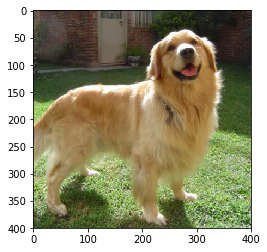

In [10]:
img = imread(golden_path)
plt.imshow(img)
print(img.shape)

In [11]:
# need to resize the image
img = imresize(img, size=(224,224), interp='bicubic')

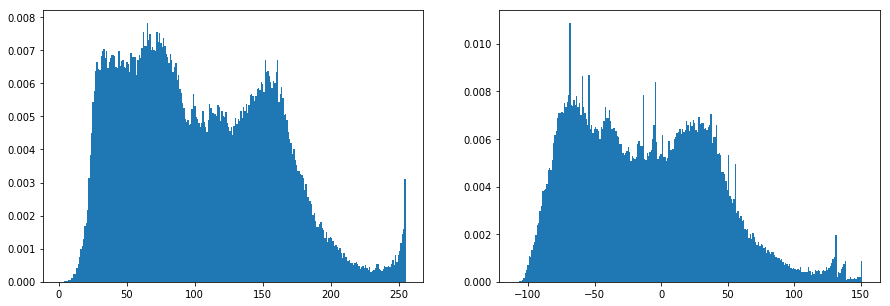

In [15]:
# apply preprocessing (specific to the training procedure used with VGG16/19)
# RGB -> BGR + mean subtraction 
img_pr = preprocess_input(img.astype(np.float32))
plt.figure(figsize=(15,5))
plt.subplot(121)
_ = plt.hist(img.flatten(), bins=255, normed=True)
plt.subplot(122)
_ = plt.hist(img_pr.flatten(), bins=255, normed=True)

In [16]:
# need to add a 'fake' dimension (bath dim)
pred = vgg16.predict(np.expand_dims(img_pr,axis=0))
print(pred.shape)

(1, 1000)


class : 207  |   0.3262121081352234


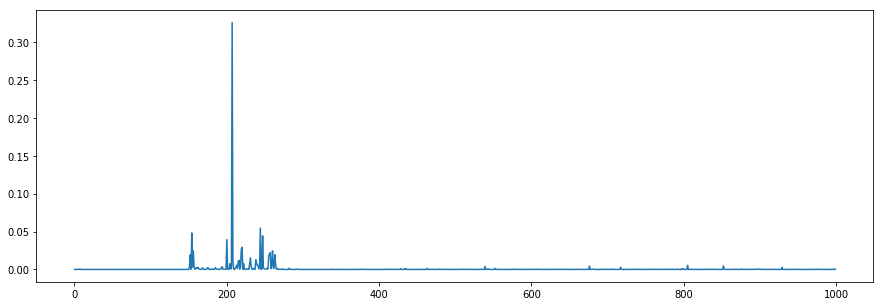

In [22]:
id_class = np.argmax(pred[0])
score_class = pred[0, id_class]
print("class : {}  |   {}".format(id_class, score_class))
plt.figure(figsize=(15,5))
_ = plt.plot(pred[0])

In [21]:
# or use the built-in function to decode the predictions 
decode_predictions(pred)

[[('n02099601', 'golden_retriever', 0.32621211),
  ('n02108551', 'Tibetan_mastiff', 0.054500803),
  ('n02086079', 'Pekinese', 0.04819677),
  ('n02109525', 'Saint_Bernard', 0.044364333),
  ('n02097474', 'Tibetan_terrier', 0.039481174)]]

# CNN Visualization 

- pre-trained VGG16 without the dense layers
- with a different shape 

- 'Model' objects get 'layers' attribute and 'get_layer(name)' method
- 

(400, 400, 3)


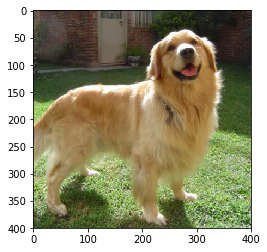

In [23]:
img = imread(golden_path)
plt.imshow(img)
print(img.shape)

In [24]:
# create a new VGG16 
vgg16 = VGG16(include_top=False, weights='imagenet', input_shape=(400,400,3))
vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 400, 400, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 400, 400, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 400, 400, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 200, 200, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 200, 200, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 200, 200, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 100, 100, 128)     0         
__________

In [40]:
# the layers are named
[(layer.name, layer) for layer in vgg16.layers]

[('input_2', <keras.engine.topology.InputLayer at 0x7fd8540c1a90>),
 ('block1_conv1', <keras.layers.convolutional.Conv2D at 0x7fd8540c1898>),
 ('block1_conv2', <keras.layers.convolutional.Conv2D at 0x7fd8540c1d30>),
 ('block1_pool', <keras.layers.pooling.MaxPooling2D at 0x7fd854176c50>),
 ('block2_conv1', <keras.layers.convolutional.Conv2D at 0x7fd8540aacf8>),
 ('block2_conv2', <keras.layers.convolutional.Conv2D at 0x7fd854146b70>),
 ('block2_pool', <keras.layers.pooling.MaxPooling2D at 0x7fd8540c59b0>),
 ('block3_conv1', <keras.layers.convolutional.Conv2D at 0x7fd85411c160>),
 ('block3_conv2', <keras.layers.convolutional.Conv2D at 0x7fd84f778978>),
 ('block3_conv3', <keras.layers.convolutional.Conv2D at 0x7fd85410f4e0>),
 ('block3_pool', <keras.layers.pooling.MaxPooling2D at 0x7fd84f5c99b0>),
 ('block4_conv1', <keras.layers.convolutional.Conv2D at 0x7fd84f641a90>),
 ('block4_conv2', <keras.layers.convolutional.Conv2D at 0x7fd84f4a7588>),
 ('block4_conv3', <keras.layers.convolutional.C

In [29]:
block2_conv2 = vgg16.get_layer('block2_conv2')
print(block2_conv2)

In [30]:
# create a new 'Model':
# - take as input the same input of vgg16
# - as output : a specific layer

features_extractor = Model(inputs=vgg16.input, outputs=block2_conv2.output)

In [32]:
img_pr = preprocess_input(img.astype(np.float32))
features = features_extractor.predict(np.expand_dims(img_pr, axis=0))[0]
print("features : {} |  {}".format(features.shape, features.dtype))

features : (200, 200, 128) |  float32


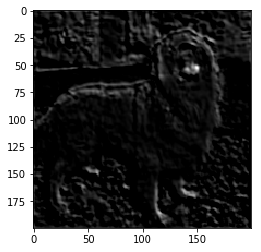

In [33]:
# plot the first feature as gray-level image 
plt.imshow(features[:, :, 0], cmap='gray')

In [38]:
# this function will plot all the feature maps within a fig of size (20,20)
def plot_feature_maps(feature_maps):
    height, width, depth = feature_maps.shape
    nb_plot = int(np.rint(np.sqrt(depth)) + 1)
    fig = plt.figure(figsize=(25, 25))
    for i in range(depth):
        plt.subplot(nb_plot, nb_plot, i+1)
        plt.imshow(feature_maps[:,:,i], cmap='gray')
        plt.title('feature map {}'.format(i+1))
    plt.show()

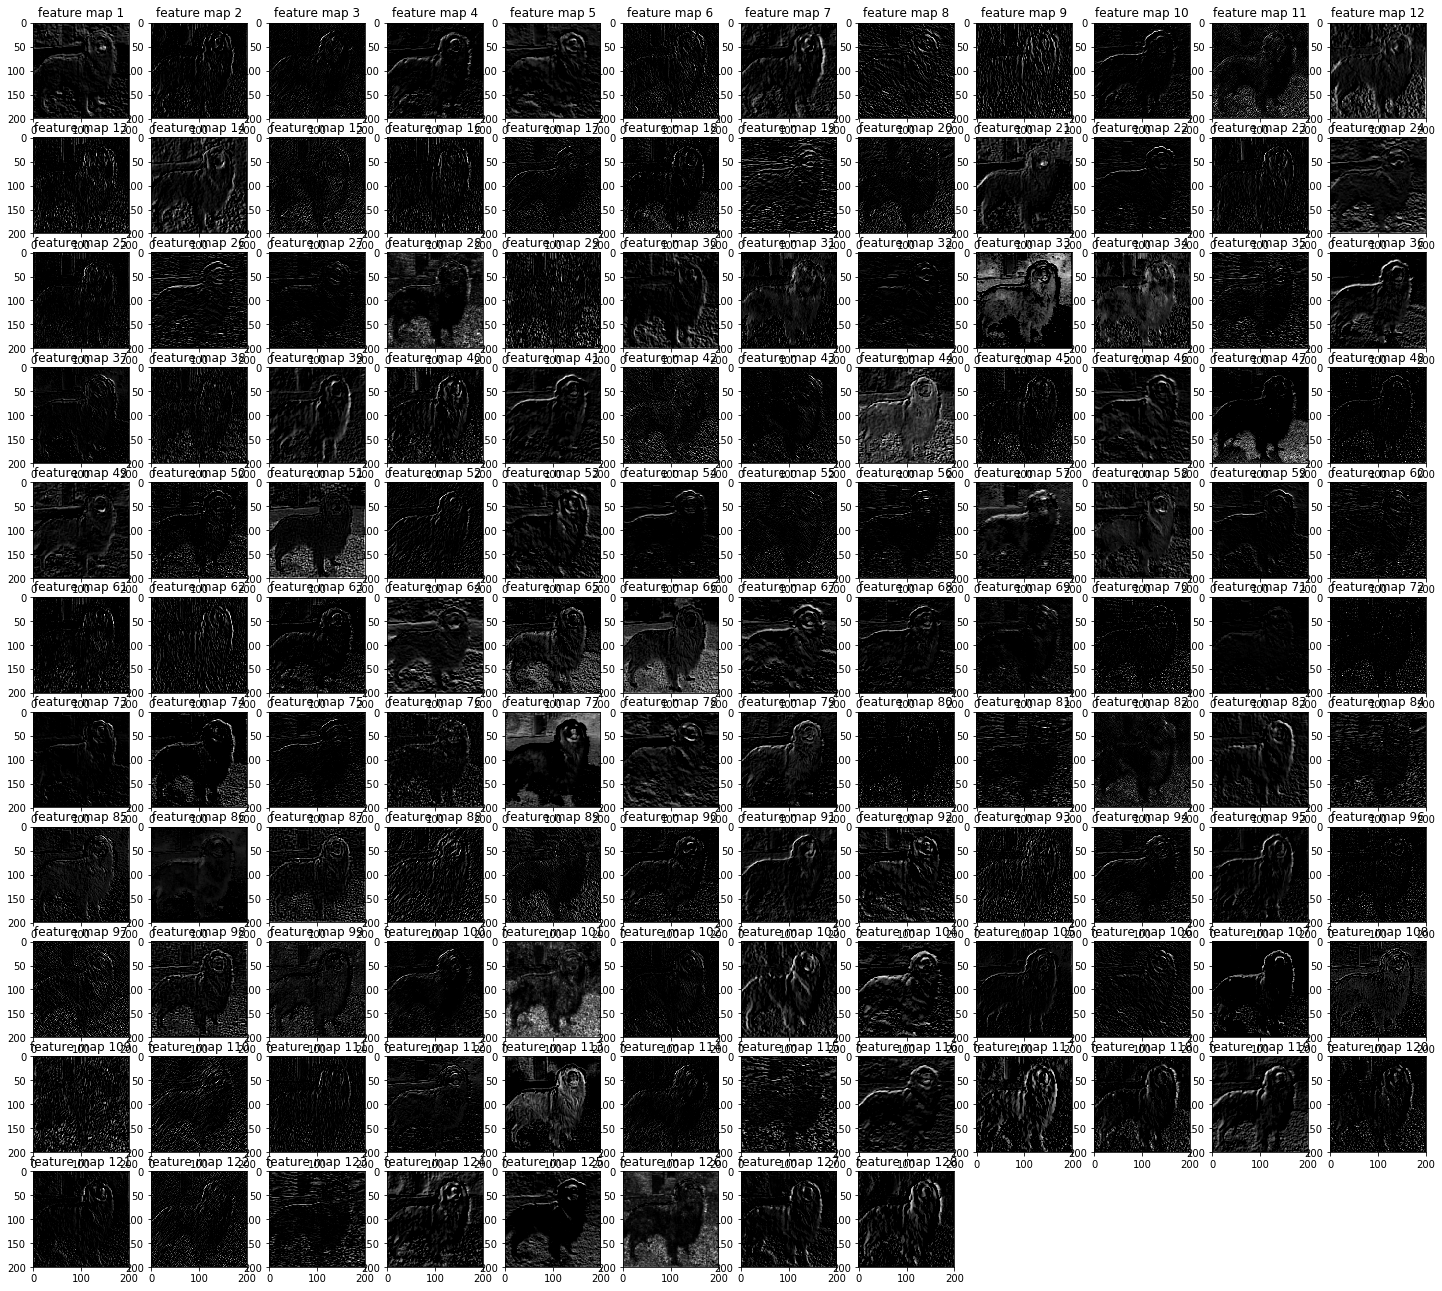

In [39]:
plot_feature_maps(features)